In [108]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Get the Data**

In [109]:
df = pd.read_csv("Titanictrain.csv")

**Check Head**

In [110]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check Info**

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


**Check a few measures of descriptive statistics**

In [112]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Of all passengers in df, how many survived, how many died ?**

<AxesSubplot:xlabel='Survived', ylabel='count'>

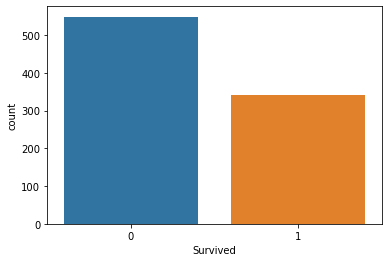

In [113]:
sns.countplot(x='Survived', data=df)

**Check the % of people who have survived.**

In [114]:
print(df.Survived.value_counts(1)[1]*100)

38.38383838383838


**Which Gender survived the crash more?**
**Male or Female?**

In [115]:
df.groupby(['Survived','Sex'])['Survived'].count()


Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

**Visualize the above numbers**

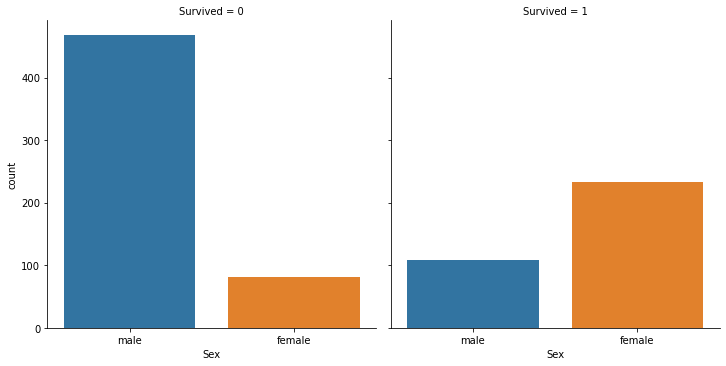

In [116]:
sns.catplot(x='Sex',col='Survived',kind='count',data=df);

**The percentage of men and women who survived the crash are?**

In [117]:
print("percentage of women survived = ",df[df.Sex=='female'].Survived.value_counts(1)[1]*100)
print("percentage of men survived = ",df[df.Sex=='male'].Survived.value_counts(1)[1]*100)

percentage of women survived =  74.20382165605095
percentage of men survived =  18.890814558058924


**Visualize the above % gender wise**

Make pie chart

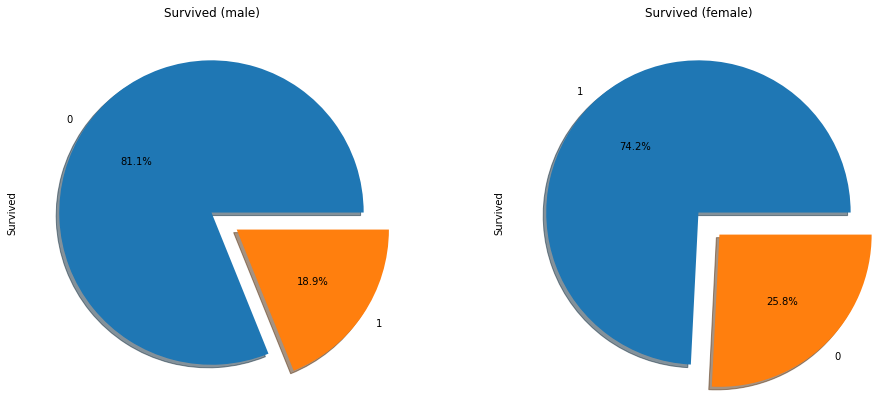

In [118]:
f,ax=plt.subplots(1,2,figsize=(16,7))
df['Survived'][df['Sex']=='male'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[0],shadow=True)
df['Survived'][df['Sex']=='female'].value_counts().plot.pie(explode=[0,0.2],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')

plt.show()

**Plot a table of `Pclass` and `Survived` variable**

In [119]:
pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


**Check the proportion of passengers who survived from different Ticket Classes**

In [120]:
print("percentage of survival are :")
print("Ticket Class = 1 : ",df.Survived[df.Pclass==1].sum()/df[df.Pclass==1].Survived.count())
print("Ticket Class = 2 : ",df.Survived[df.Pclass==2].sum()/df[df.Pclass==2].Survived.count())
print("Ticket Class = 3 : ",df.Survived[df.Pclass==3].sum()/df[df.Pclass==3].Survived.count())

percentage of survival are :
Ticket Class = 1 :  0.6296296296296297
Ticket Class = 2 :  0.47282608695652173
Ticket Class = 3 :  0.24236252545824846


**Plot the fraction of passengers survived against their Ticket Class**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


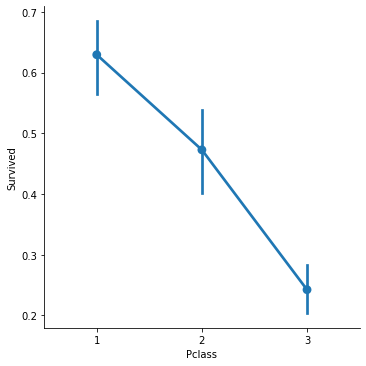

In [121]:
sns.catplot('Pclass','Survived',kind='point',data=df);

Let us remove the confidence intervals and try to plot it once more.

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


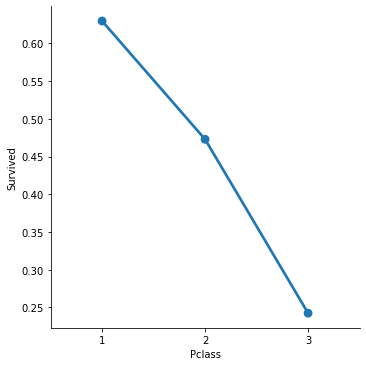

In [122]:
sns.catplot('Pclass','Survived',kind='point',data=df,ci=False);

**Plot a table of `Sex`,`Pclass` and `Survived` variable**

In [123]:
pd.crosstab([df.Sex,df.Survived] ,df.Pclass ,margins=True).style.background_gradient(cmap='autumn_r')

**Plot the proportion of people who survived the crash of the ship keeping the gender in mind**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


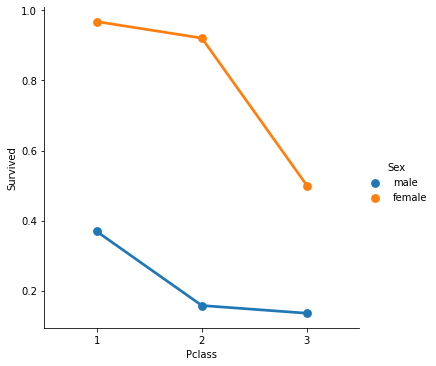

In [124]:
sns.catplot('Pclass','Survived',kind='point',hue='Sex',data=df,ci=False);

**Make a countplot for `Survived` and `Embarked` variables**

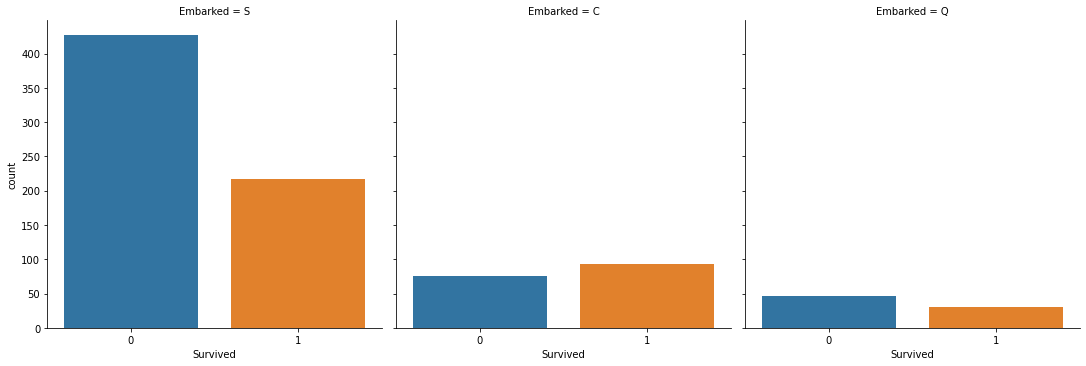

In [125]:
sns.catplot(x='Survived',col='Embarked',kind='count',data=df);

**Make a point plot for `Survived` and `Embarked` variables**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


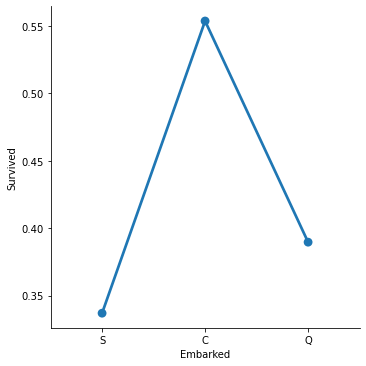

In [126]:
sns.catplot('Embarked','Survived',kind='point',data=df,ci=False);

**Make a point plot for `Survived`,`Embarked` and `Sex` variables**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


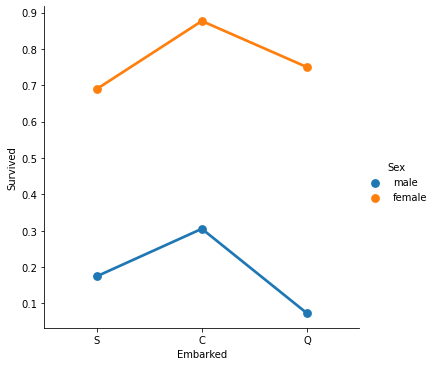

In [127]:
sns.catplot('Embarked','Survived',hue='Sex',kind='point',data=df,ci=False);

**Make a point plot for `Survived`,`Embarked`,`Sex`, and `Pclass` variables**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


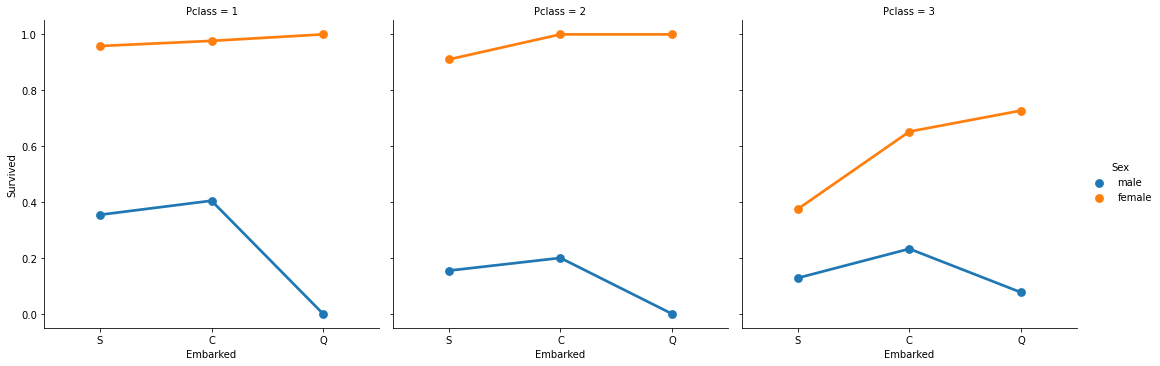

In [128]:
sns.catplot('Embarked','Survived',col='Pclass',hue='Sex',kind='point',data=df,ci=False);

**Make a table of `Sex`,`Pclass`,`Embarked`,`Survived` variables**

In [129]:
pd.crosstab([df.Survived] ,[df.Sex,df.Pclass,df.Embarked],margins=True)

Sex      female                              male                            \
Pclass        1         2          3            1          2          3       
Embarked      C  Q   S  C  Q   S   C   Q   S    C  Q   S   C  Q   S   C   Q   
Survived                                                                      
0             1  0   2  0  0   6   8   9  55   25  1  51   8  1  82  33  36   
1            42  1  46  7  2  61  15  24  33   17  0  28   2  0  15  10   3   
All          43  1  48  7  2  67  23  33  88   42  1  79  10  1  97  43  39   

Sex            All  
Pclass              
Embarked    S       
Survived            
0         231  549  
1          34  340  
All       265  889

**Check the distribution of the fare**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


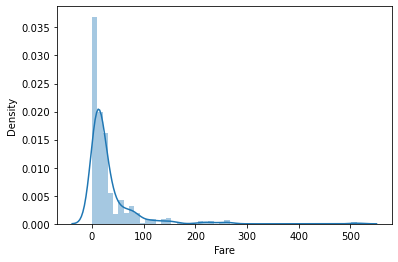

In [130]:
sns.distplot(df['Fare']);

**Make the point plot of `Survived`,`Sex`, `Pclass`**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


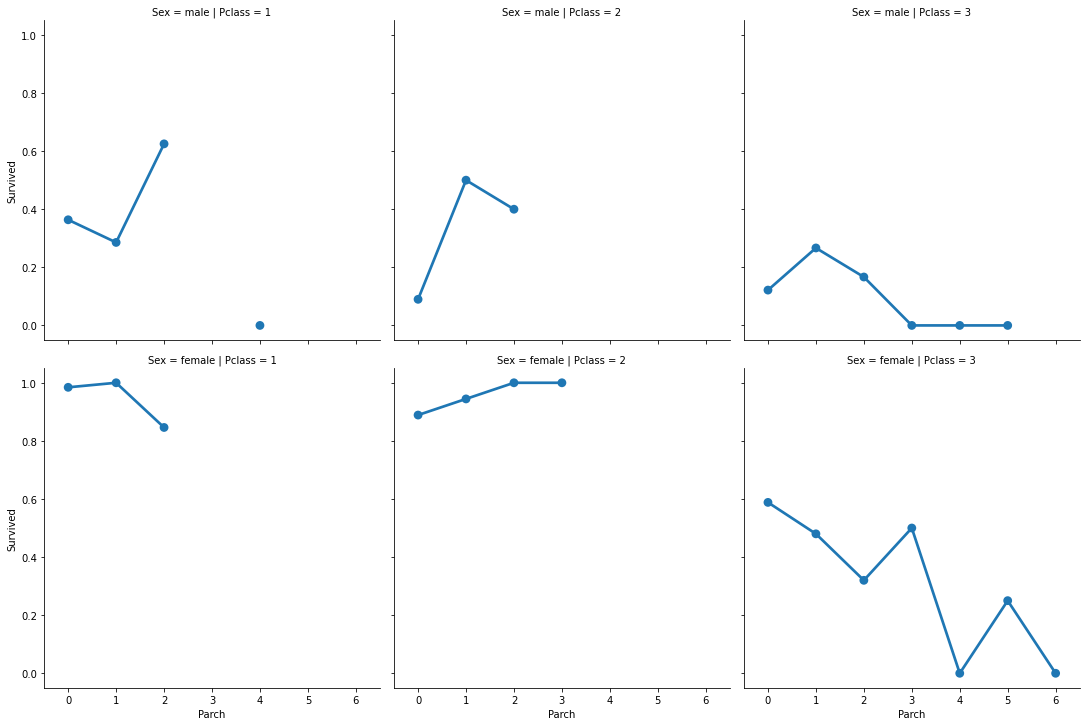

In [131]:
sns.catplot('Parch' ,'Survived' ,col='Pclass' ,row='Sex' ,kind='point' ,data=df ,ci=False);

**Plot the proportion of siblings / spouses aboard the Titanic who have survived.**

D:\Users\Lima\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


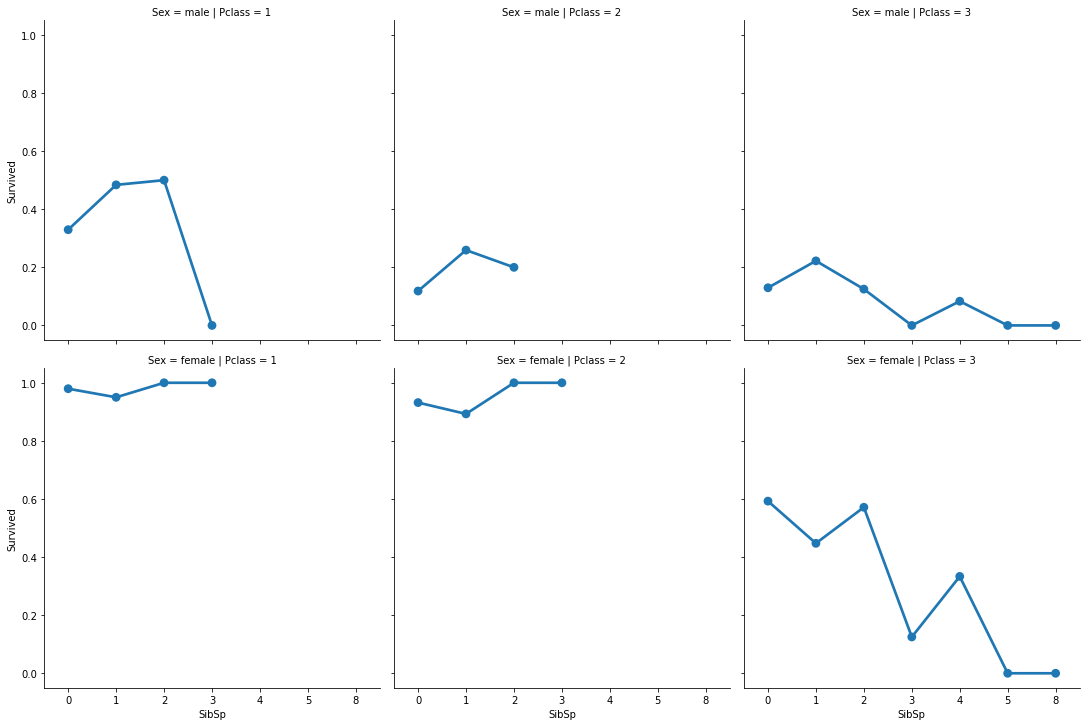

In [132]:
sns.catplot('SibSp' ,'Survived' ,col='Pclass' ,row='Sex', kind='point' ,data=df ,ci=False);

Let us check the correlation among various values.

**Make the 'heatmap' of Correlation**

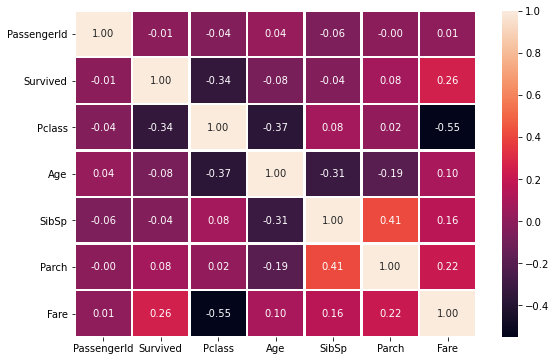

In [133]:
corr = df.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

                                                Happy Learning